In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import math

In [4]:
# importing csv file

glassDF = pd.read_csv('glass.csv')

glassDF.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glassDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
# checking for missing or null values

print("Missing values:")
print(glassDF.isnull().sum())

Missing values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [10]:
# checking for duplicated values

print("Duplicated values:", glassDF.duplicated().sum())

Duplicated values 1


In [11]:
# drop the duplicated values

glassDF.drop_duplicates(inplace = True)

In [12]:
# rechecking for duplicated values

print("Duplicate values:", glassDF.duplicated().sum())

Duplicate values: 0


In [13]:
glassDF.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
glassDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [18]:
glassDF.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
glassDF.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


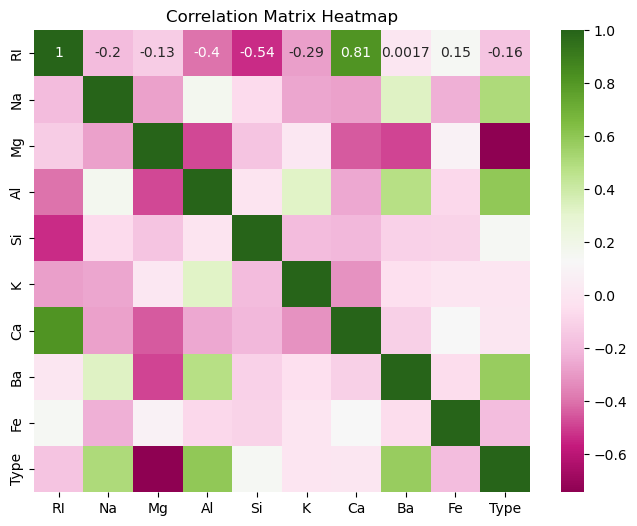

In [19]:
# Create a correlation matrix

corMatrx = glassDF.corr()

#Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corMatrx, annot=True, cmap='PiYG')
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='Na', ylabel='Ca'>

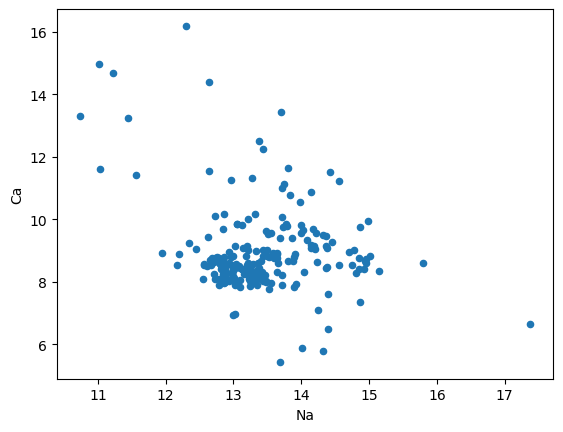

In [22]:
# scatter plotting
glassDF.plot.scatter(x = "Na", y = "Ca")

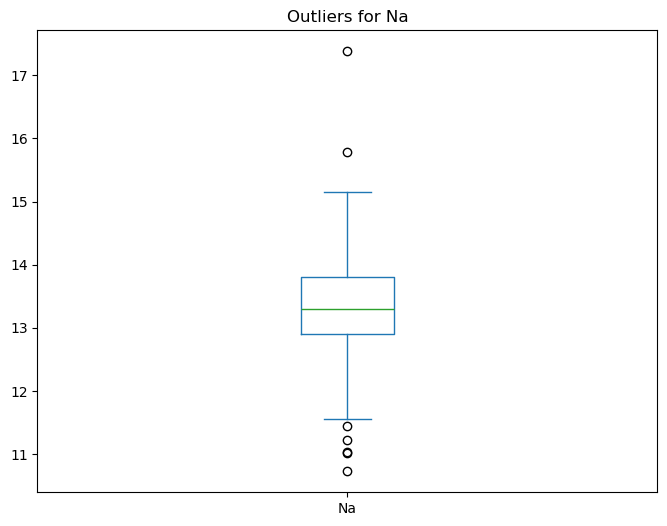

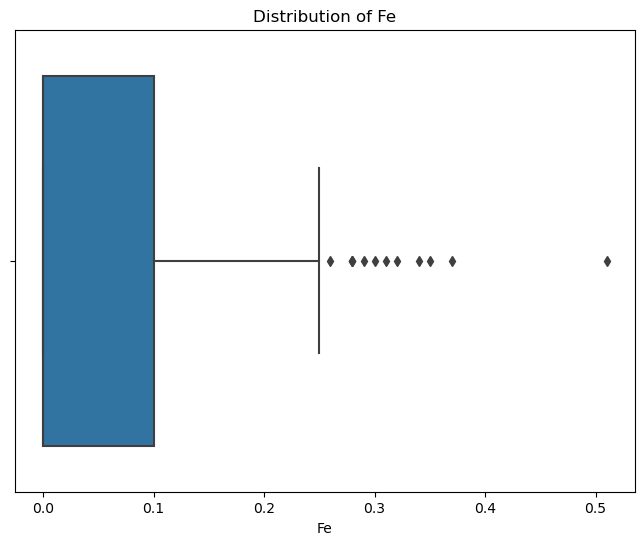

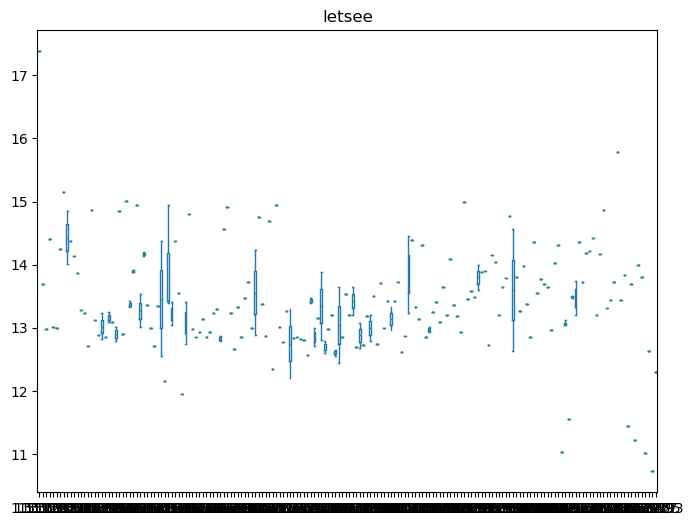

<function matplotlib.pyplot.show(close=None, block=None)>

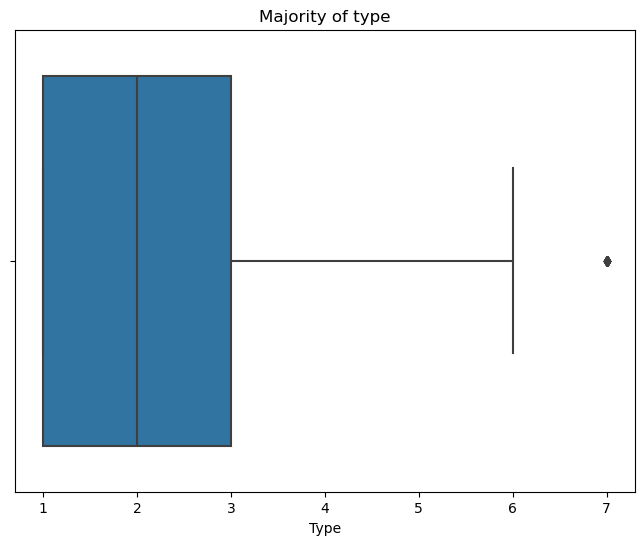

In [41]:
# Visualize the distribution and identify outliers for each chemical element
# using box plot

# Na ko using matplotlib 
glassDF.plot.box(column="Na", figsize = (8,6))
plt.title('Outliers for Na')
plt.show()

# Fe using sns (gave horizontally)
plt.figure(figsize = (8,6))
sns.boxplot (x = glassDF ['Fe'])
plt.title('Distribution of Fe')
plt.show()

# Ca using matplotlib onkt
glassDF.plot.box(column='Na', by='RI', figsize=(8,6))
plt.title('letsee')
plt.show()
#idk yo ke ho but yesari ni garna milne rahecha

# type using sns
plt.figure(figsize = (8,6))
sns.boxplot (x = glassDF['Type'])
plt.title('Majority of type')
plt.show

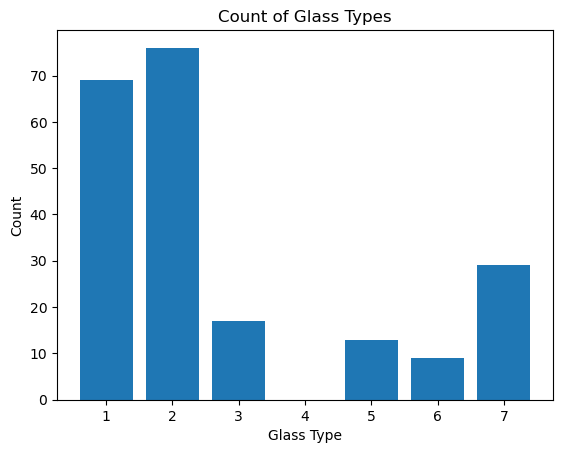

In [43]:
# Show the count or proportion of each glass type in the dataset.
# Bar chart

# Calculate value counts (counts of each type)
type_counts = glassDF['Type'].value_counts()

# Create the bar chart
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('Count of Glass Types')
plt.show()

In [47]:
# creating a new dataframe with necessary columns only

columnsToKeep = ['Na', 'Mg', 'K', 'Ca', 'Ba']
sBlockDF = glassDF[columnsToKeep]
sBlockDF.head()

,Na,Mg,K,Ca,Ba
0,13.64,4.49,0.06,8.75,0.0
1,13.89,3.60,0.48,7.83,0.0
2,13.53,3.55,0.39,7.78,0.0
3,13.21,3.69,0.57,8.22,0.0
4,13.27,3.62,0.55,8.07,0.0


<Axes: >

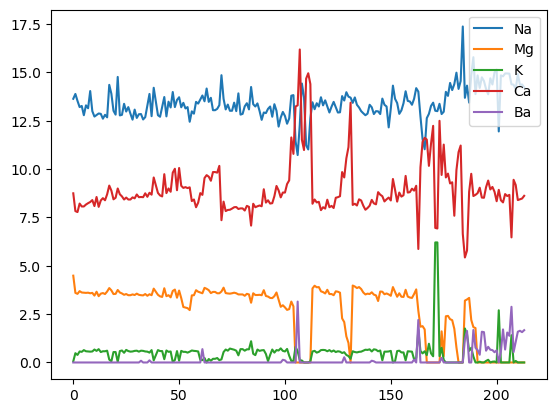

In [48]:
# line graph of all the s-block elements

sBlockDF.plot()

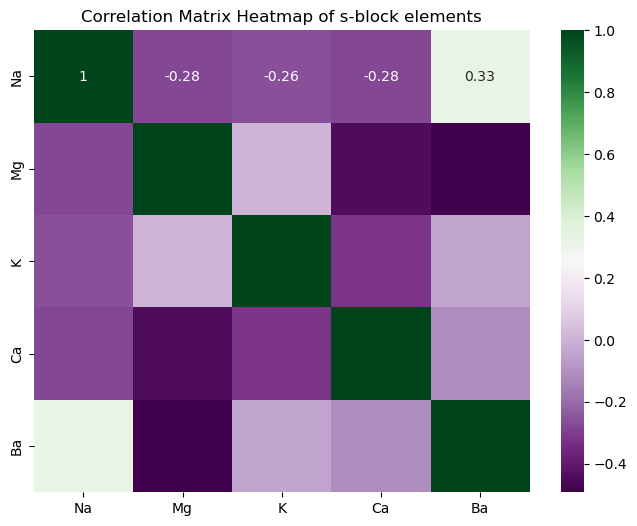

In [49]:
# heatmap of s-block elements

#Create a correlation matrix

corMatrx = sBlockDF.corr()

#Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corMatrx, annot=True, cmap='PRGn')
plt.title('Correlation Matrix Heatmap of s-block elements')
plt.show()